# Predicting Flight Delays

In [1]:
# import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score

/Users/Martin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Part 1: Import/Clean Data

In [2]:
# read all 2016 datasets
# january
flights_jan = pd.read_csv('./data/99309118_T_ONTIME_JAN/99309118_T_ONTIME_2016_1.csv')

In [3]:
flights_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445827 entries, 0 to 445826
Data columns (total 36 columns):
YEAR                   445827 non-null int64
QUARTER                445827 non-null int64
MONTH                  445827 non-null int64
DAY_OF_MONTH           445827 non-null int64
DAY_OF_WEEK            445827 non-null int64
FL_DATE                445827 non-null object
UNIQUE_CARRIER         445827 non-null object
FL_NUM                 445827 non-null int64
ORIGIN                 445827 non-null object
ORIGIN_CITY_NAME       445827 non-null object
ORIGIN_STATE_ABR       445827 non-null object
DEST                   445827 non-null object
DEST_CITY_NAME         445827 non-null object
DEST_STATE_ABR         445827 non-null object
CRS_DEP_TIME           445827 non-null int64
DEP_TIME               434354 non-null float64
DEP_DELAY              434354 non-null float64
DEP_DELAY_NEW          434354 non-null float64
DEP_DEL15              434354 non-null float64
DEP_DELAY_GROUP   

In [4]:
# february
flights_feb = pd.read_csv('./data/99309118_T_ONTIME_FEB/99309118_T_ONTIME_2016_2.csv')
flights_feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423889 entries, 0 to 423888
Data columns (total 36 columns):
YEAR                   423889 non-null int64
QUARTER                423889 non-null int64
MONTH                  423889 non-null int64
DAY_OF_MONTH           423889 non-null int64
DAY_OF_WEEK            423889 non-null int64
FL_DATE                423889 non-null object
UNIQUE_CARRIER         423889 non-null object
FL_NUM                 423889 non-null int64
ORIGIN                 423889 non-null object
ORIGIN_CITY_NAME       423889 non-null object
ORIGIN_STATE_ABR       423889 non-null object
DEST                   423889 non-null object
DEST_CITY_NAME         423889 non-null object
DEST_STATE_ABR         423889 non-null object
CRS_DEP_TIME           423889 non-null int64
DEP_TIME               417316 non-null float64
DEP_DELAY              417316 non-null float64
DEP_DELAY_NEW          417316 non-null float64
DEP_DEL15              417316 non-null float64
DEP_DELAY_GROUP   

In [5]:
# march
flights_mar = pd.read_csv('./data/99309118_T_ONTIME_MAR/99309118_T_ONTIME_2016_3.csv')
flights_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479122 entries, 0 to 479121
Data columns (total 36 columns):
YEAR                   479122 non-null int64
QUARTER                479122 non-null int64
MONTH                  479122 non-null int64
DAY_OF_MONTH           479122 non-null int64
DAY_OF_WEEK            479122 non-null int64
FL_DATE                479122 non-null object
UNIQUE_CARRIER         479122 non-null object
FL_NUM                 479122 non-null int64
ORIGIN                 479122 non-null object
ORIGIN_CITY_NAME       479122 non-null object
ORIGIN_STATE_ABR       479122 non-null object
DEST                   479122 non-null object
DEST_CITY_NAME         479122 non-null object
DEST_STATE_ABR         479122 non-null object
CRS_DEP_TIME           479122 non-null int64
DEP_TIME               474605 non-null float64
DEP_DELAY              474605 non-null float64
DEP_DELAY_NEW          474605 non-null float64
DEP_DEL15              474605 non-null float64
DEP_DELAY_GROUP   

In [6]:
# april
flights_apr = pd.read_csv('./data/99309118_T_ONTIME_APR/99309118_T_ONTIME_2016_4.csv')
flights_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461630 entries, 0 to 461629
Data columns (total 36 columns):
YEAR                   461630 non-null int64
QUARTER                461630 non-null int64
MONTH                  461630 non-null int64
DAY_OF_MONTH           461630 non-null int64
DAY_OF_WEEK            461630 non-null int64
FL_DATE                461630 non-null object
UNIQUE_CARRIER         461630 non-null object
FL_NUM                 461630 non-null int64
ORIGIN                 461630 non-null object
ORIGIN_CITY_NAME       461630 non-null object
ORIGIN_STATE_ABR       461630 non-null object
DEST                   461630 non-null object
DEST_CITY_NAME         461630 non-null object
DEST_STATE_ABR         461630 non-null object
CRS_DEP_TIME           461630 non-null int64
DEP_TIME               457634 non-null float64
DEP_DELAY              457634 non-null float64
DEP_DELAY_NEW          457634 non-null float64
DEP_DEL15              457634 non-null float64
DEP_DELAY_GROUP   

In [7]:
# may
flights_may = pd.read_csv('./data/99309118_T_ONTIME_MAY/99309118_T_ONTIME_2016_5.csv')
flights_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479358 entries, 0 to 479357
Data columns (total 36 columns):
YEAR                   479358 non-null int64
QUARTER                479358 non-null int64
MONTH                  479358 non-null int64
DAY_OF_MONTH           479358 non-null int64
DAY_OF_WEEK            479358 non-null int64
FL_DATE                479358 non-null object
UNIQUE_CARRIER         479358 non-null object
FL_NUM                 479358 non-null int64
ORIGIN                 479358 non-null object
ORIGIN_CITY_NAME       479358 non-null object
ORIGIN_STATE_ABR       479358 non-null object
DEST                   479358 non-null object
DEST_CITY_NAME         479358 non-null object
DEST_STATE_ABR         479358 non-null object
CRS_DEP_TIME           479358 non-null int64
DEP_TIME               477015 non-null float64
DEP_DELAY              477015 non-null float64
DEP_DELAY_NEW          477015 non-null float64
DEP_DEL15              477015 non-null float64
DEP_DELAY_GROUP   

In [8]:
# june
flights_jun = pd.read_csv('./data/99309118_T_ONTIME_JUN/99309118_T_ONTIME_2016_6.csv')
flights_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487637 entries, 0 to 487636
Data columns (total 36 columns):
YEAR                   487637 non-null int64
QUARTER                487637 non-null int64
MONTH                  487637 non-null int64
DAY_OF_MONTH           487637 non-null int64
DAY_OF_WEEK            487637 non-null int64
FL_DATE                487637 non-null object
UNIQUE_CARRIER         487637 non-null object
FL_NUM                 487637 non-null int64
ORIGIN                 487637 non-null object
ORIGIN_CITY_NAME       487637 non-null object
ORIGIN_STATE_ABR       487637 non-null object
DEST                   487637 non-null object
DEST_CITY_NAME         487637 non-null object
DEST_STATE_ABR         487637 non-null object
CRS_DEP_TIME           487637 non-null int64
DEP_TIME               482889 non-null float64
DEP_DELAY              482889 non-null float64
DEP_DELAY_NEW          482889 non-null float64
DEP_DEL15              482889 non-null float64
DEP_DELAY_GROUP   

In [9]:
# july
flights_jul = pd.read_csv('./data/99309118_T_ONTIME_JUL/99309118_T_ONTIME_2016_7.csv')
flights_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502457 entries, 0 to 502456
Data columns (total 36 columns):
YEAR                   502457 non-null int64
QUARTER                502457 non-null int64
MONTH                  502457 non-null int64
DAY_OF_MONTH           502457 non-null int64
DAY_OF_WEEK            502457 non-null int64
FL_DATE                502457 non-null object
UNIQUE_CARRIER         502457 non-null object
FL_NUM                 502457 non-null int64
ORIGIN                 502457 non-null object
ORIGIN_CITY_NAME       502457 non-null object
ORIGIN_STATE_ABR       502457 non-null object
DEST                   502457 non-null object
DEST_CITY_NAME         502457 non-null object
DEST_STATE_ABR         502457 non-null object
CRS_DEP_TIME           502457 non-null int64
DEP_TIME               493607 non-null float64
DEP_DELAY              493607 non-null float64
DEP_DELAY_NEW          493607 non-null float64
DEP_DEL15              493607 non-null float64
DEP_DELAY_GROUP   

In [10]:
# august
flights_aug = pd.read_csv('./data/99309118_T_ONTIME_AUG/99309118_T_ONTIME_2016_8.csv')
flights_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498347 entries, 0 to 498346
Data columns (total 36 columns):
YEAR                   498347 non-null int64
QUARTER                498347 non-null int64
MONTH                  498347 non-null int64
DAY_OF_MONTH           498347 non-null int64
DAY_OF_WEEK            498347 non-null int64
FL_DATE                498347 non-null object
UNIQUE_CARRIER         498347 non-null object
FL_NUM                 498347 non-null int64
ORIGIN                 498347 non-null object
ORIGIN_CITY_NAME       498347 non-null object
ORIGIN_STATE_ABR       498347 non-null object
DEST                   498347 non-null object
DEST_CITY_NAME         498347 non-null object
DEST_STATE_ABR         498347 non-null object
CRS_DEP_TIME           498347 non-null int64
DEP_TIME               491761 non-null float64
DEP_DELAY              491761 non-null float64
DEP_DELAY_NEW          491761 non-null float64
DEP_DEL15              491761 non-null float64
DEP_DELAY_GROUP   

In [11]:
# september
flights_sep = pd.read_csv('./data/99309118_T_ONTIME_SEP/99309118_T_ONTIME_2016_9.csv')
flights_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454878 entries, 0 to 454877
Data columns (total 36 columns):
YEAR                   454878 non-null int64
QUARTER                454878 non-null int64
MONTH                  454878 non-null int64
DAY_OF_MONTH           454878 non-null int64
DAY_OF_WEEK            454878 non-null int64
FL_DATE                454878 non-null object
UNIQUE_CARRIER         454878 non-null object
FL_NUM                 454878 non-null int64
ORIGIN                 454878 non-null object
ORIGIN_CITY_NAME       454878 non-null object
ORIGIN_STATE_ABR       454878 non-null object
DEST                   454878 non-null object
DEST_CITY_NAME         454878 non-null object
DEST_STATE_ABR         454878 non-null object
CRS_DEP_TIME           454878 non-null int64
DEP_TIME               453449 non-null float64
DEP_DELAY              453449 non-null float64
DEP_DELAY_NEW          453449 non-null float64
DEP_DEL15              453449 non-null float64
DEP_DELAY_GROUP   

In [12]:
# merge data for all months

flights_all = pd.concat([flights_jan,flights_feb,flights_mar,flights_apr,flights_may,flights_jun,flights_jul,flights_aug,flights_sep], axis=0, ignore_index=True)
flights_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233145 entries, 0 to 4233144
Data columns (total 36 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 int64
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK           object
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
ARR_TIME_BLK           object
CANCELLED              float64
DIVERTED      

In [13]:
flights_all.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,Unnamed: 35
0,2016,1,1,19,2,2016-01-19,DL,2452,ATL,"Atlanta, GA",...,-1.0,1100-1159,0.0,0.0,89.0,84.0,1.0,481.0,2,NaN
1,2016,1,1,19,2,2016-01-19,DL,2452,RIC,"Richmond, VA",...,-2.0,1400-1459,0.0,0.0,112.0,96.0,1.0,481.0,2,NaN
2,2016,1,1,19,2,2016-01-19,DL,2453,BOS,"Boston, MA",...,-2.0,1000-1059,0.0,0.0,348.0,309.0,1.0,2105.0,9,NaN
3,2016,1,1,19,2,2016-01-19,DL,2454,SNA,"Santa Ana, CA",...,-1.0,1400-1459,0.0,0.0,261.0,254.0,1.0,1919.0,8,NaN
4,2016,1,1,19,2,2016-01-19,DL,2455,SAN,"San Diego, CA",...,-2.0,2000-2059,0.0,0.0,326.0,299.0,1.0,2446.0,10,NaN


In [14]:
flights_all.drop('Unnamed: 35', axis=1, inplace=True)

In [15]:
flights_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233145 entries, 0 to 4233144
Data columns (total 35 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 int64
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK           object
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
ARR_TIME_BLK           object
CANCELLED              float64
DIVERTED      

In [16]:
flights_all['cat_response']=flights_all['DEP_DELAY_NEW'].apply(lambda x: 0 if x == 0 else 1)
flights_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233145 entries, 0 to 4233144
Data columns (total 36 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 int64
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK           object
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
ARR_TIME_BLK           object
CANCELLED              float64
DIVERTED      

In [17]:
flights_all.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
UNIQUE_CARRIER             0
FL_NUM                     0
ORIGIN                     0
ORIGIN_CITY_NAME           0
ORIGIN_STATE_ABR           0
DEST                       0
DEST_CITY_NAME             0
DEST_STATE_ABR             0
CRS_DEP_TIME               0
DEP_TIME               50515
DEP_DELAY              50515
DEP_DELAY_NEW          50515
DEP_DEL15              50515
DEP_DELAY_GROUP        50515
DEP_TIME_BLK               0
CRS_ARR_TIME               0
ARR_TIME               54099
ARR_DELAY              63626
ARR_DELAY_NEW          63626
ARR_DEL15              63626
ARR_DELAY_GROUP        63626
ARR_TIME_BLK               0
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           4
ACTUAL_ELAPSED_TIME    63626
FLIGHTS                    0
DISTANCE                   0
DISTANCE_GROUP

In [18]:
print flights_all['CANCELLED'].sum() + flights_all['DIVERTED'].sum()

63626.0


In [19]:
flights_all = flights_all[(flights_all.DIVERTED == 0) & (flights_all.CANCELLED == 0)]
flights_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4169519 entries, 0 to 4233144
Data columns (total 36 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
UNIQUE_CARRIER         object
FL_NUM                 int64
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
CRS_DEP_TIME           int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK           object
CRS_ARR_TIME           int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
ARR_TIME_BLK           object
CANCELLED              float64
DIVERTED      

In [20]:
flights_all.isnull().sum()

YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
FL_DATE                0
UNIQUE_CARRIER         0
FL_NUM                 0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_STATE_ABR       0
DEST                   0
DEST_CITY_NAME         0
DEST_STATE_ABR         0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DELAY_NEW          0
DEP_DEL15              0
DEP_DELAY_GROUP        0
DEP_TIME_BLK           0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
ARR_DELAY_NEW          0
ARR_DEL15              0
ARR_DELAY_GROUP        0
ARR_TIME_BLK           0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
FLIGHTS                0
DISTANCE               0
DISTANCE_GROUP         0
cat_response           0
dtype: int64

## Part 2: Featurize/Visual Analysis

In [21]:
flights_all.cat_response.mean()

0.3467944383992494

In [22]:
# null accuracy
1-flights_all.cat_response.mean()

0.6532055616007506

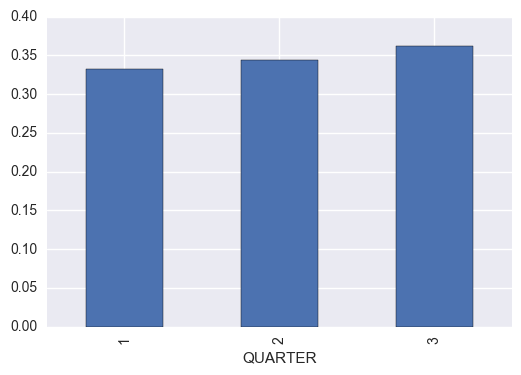

In [23]:
# look for important features
# QUARTER

%matplotlib inline
import matplotlib.pyplot as plt

flights_all.groupby('QUARTER').cat_response.mean().plot(kind='bar')

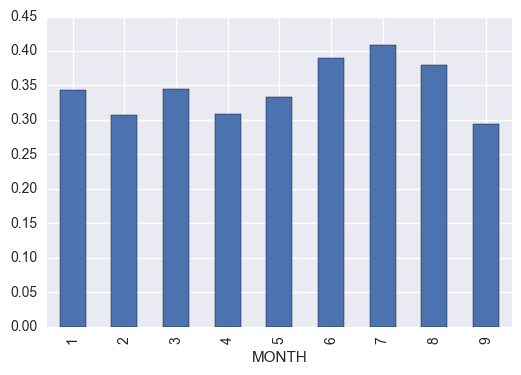

In [24]:
# MONTH
flights_all.groupby('MONTH').cat_response.mean().plot(kind='bar')

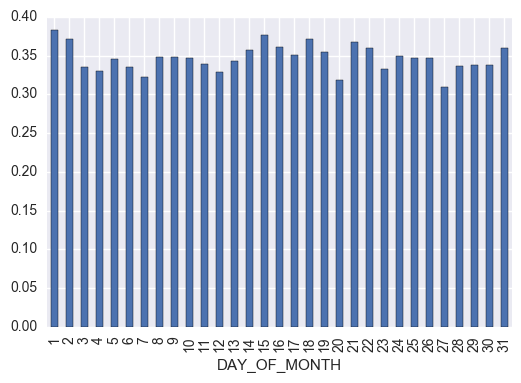

In [25]:
# DAY_OF_MONTH
flights_all.groupby('DAY_OF_MONTH').cat_response.mean().plot(kind='bar')

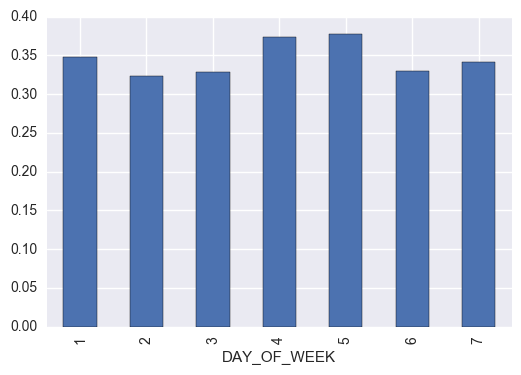

In [26]:
# DAY_OF_WEEK
flights_all.groupby('DAY_OF_WEEK').cat_response.mean().plot(kind='bar')

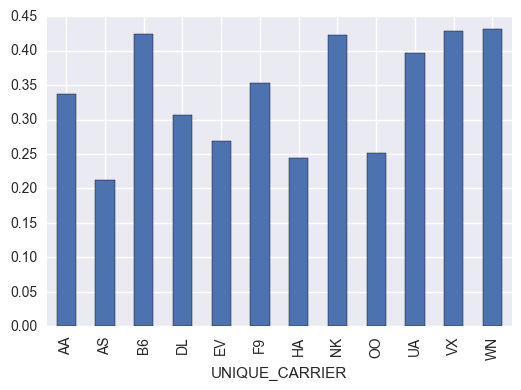

In [27]:
# UNIQUE_CARRIER
flights_all.groupby('UNIQUE_CARRIER').cat_response.mean().plot(kind='bar')

In [28]:
flights_all.UNIQUE_CARRIER.value_counts()

WN    958016
DL    693089
AA    682481
OO    450840
UA    397665
EV    365964
B6    208496
AS    133909
NK    100492
F9     69893
HA     57983
VX     50691
Name: UNIQUE_CARRIER, dtype: int64

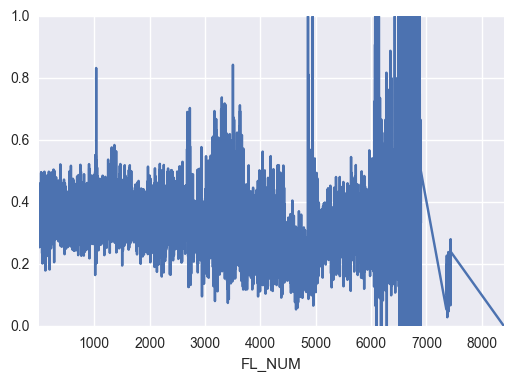

In [29]:
# FL_NUM
flights_all.groupby('FL_NUM').cat_response.mean().plot()

In [30]:
# ORIGIN
flights_all.groupby('ORIGIN').cat_response.mean().sort_values()

ORIGIN
MHK    0.000000
LWS    0.095506
HLN    0.104083
SCC    0.104334
EKO    0.104603
BET    0.110335
PIH    0.111601
RKS    0.112288
GJT    0.115228
TYR    0.116456
BIL    0.123855
LCH    0.127139
GCC    0.133508
YAK    0.135849
IDA    0.136120
YUM    0.137705
BTM    0.138340
GFK    0.141232
ISN    0.142113
CPR    0.143750
BRO    0.145529
FCA    0.148328
AZO    0.149077
BLI    0.150215
GTF    0.151474
BRW    0.154412
SIT    0.160471
LSE    0.165574
HOB    0.167411
PSG    0.167587
         ...   
IAG    0.381679
HYA    0.382609
SMF    0.386306
SFO    0.388617
PBI    0.396163
JFK    0.397761
ACK    0.398955
STL    0.400672
ACY    0.401663
ORD    0.403601
FLL    0.404541
LAS    0.409935
ABI    0.410256
BWI    0.411596
ORH    0.416350
EWR    0.416726
BQN    0.418470
MIA    0.423777
WYS    0.428571
PBG    0.432099
MMH    0.441558
LAX    0.446917
OAK    0.448226
MDW    0.449906
HOU    0.456794
OTH    0.475983
DAL    0.476074
GUM    0.481752
MVY    0.576923
EFD    1.000000
Name: cat_respons

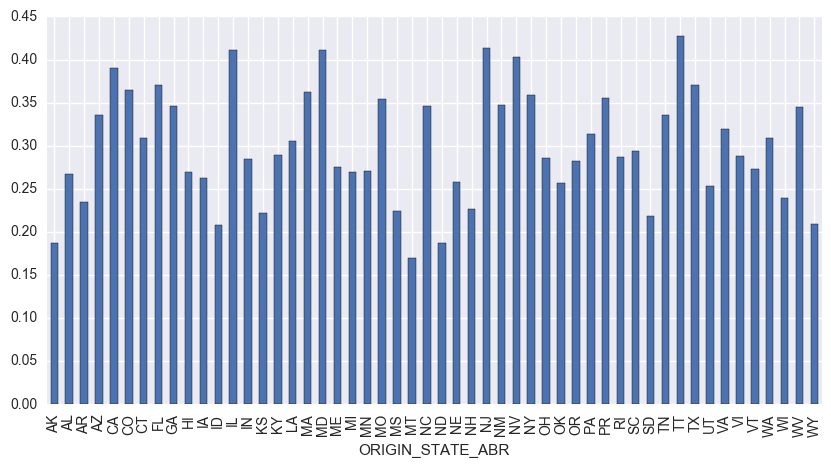

In [31]:
# ORIGIN_STATE_ABR
flights_all.groupby('ORIGIN_STATE_ABR').cat_response.mean().plot(kind='bar',figsize=(10,5))

In [32]:
# DEST
flights_all.groupby('DEST').cat_response.mean().sort_values()

DEST
MHK    0.000000
LWS    0.069549
EKO    0.073375
TWF    0.089796
BET    0.096234
CDC    0.096360
BTM    0.104208
ADQ    0.107579
PIH    0.113069
BRW    0.116348
COD    0.124829
YUM    0.126640
AKN    0.126984
ROW    0.133094
WYS    0.138393
FLG    0.145996
CDV    0.147940
ABR    0.149171
HIB    0.151599
ITH    0.153251
SCC    0.153481
OTZ    0.153846
RHI    0.154746
GJT    0.157942
CIU    0.158824
PLN    0.160757
BRD    0.164927
BJI    0.165138
CPR    0.167857
GCC    0.167979
         ...   
BDL    0.388979
IAD    0.389031
LAS    0.393744
LAX    0.395802
MDW    0.395981
SMF    0.396725
EWR    0.397683
PBI    0.403624
HPN    0.403976
ELP    0.405634
RNO    0.405838
JFK    0.407229
SAT    0.407607
DAL    0.408438
ABQ    0.408784
LGA    0.415328
FLL    0.418183
MVY    0.418803
HOU    0.422547
SJU    0.426686
SFO    0.430578
OTH    0.431111
OAK    0.431877
PBG    0.434426
ACY    0.442245
ISP    0.451893
BQN    0.547876
SWF    0.574861
PSE    0.579114
GUM    0.704380
Name: cat_response,

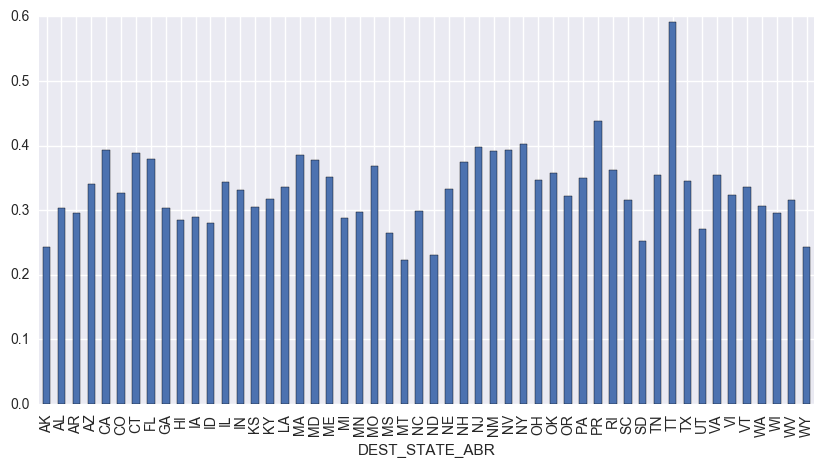

In [33]:
# DEST_STATE_ABR
flights_all.groupby('DEST_STATE_ABR').cat_response.mean().plot(kind='bar',figsize=(10,5))

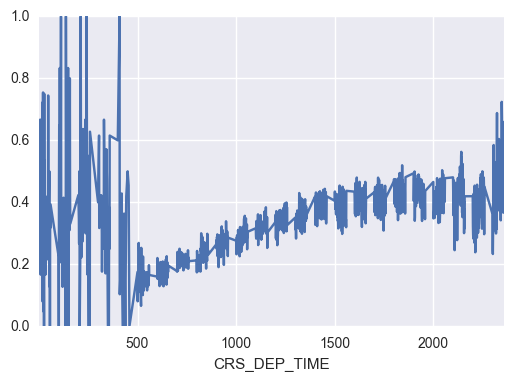

In [34]:
# CRS_DEP_TIME
flights_all.groupby('CRS_DEP_TIME').cat_response.mean().plot()

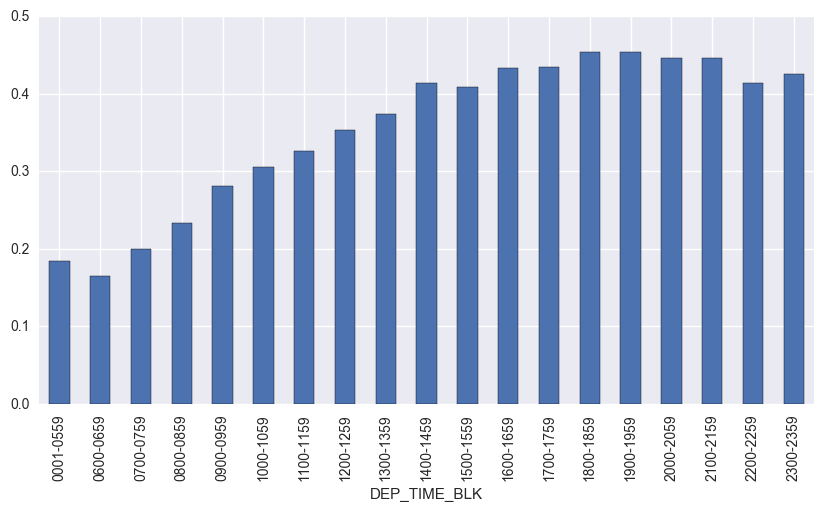

In [35]:
# DEP_TIME_BLK
flights_all.groupby('DEP_TIME_BLK').cat_response.mean().plot(kind='bar',figsize=(10,5))

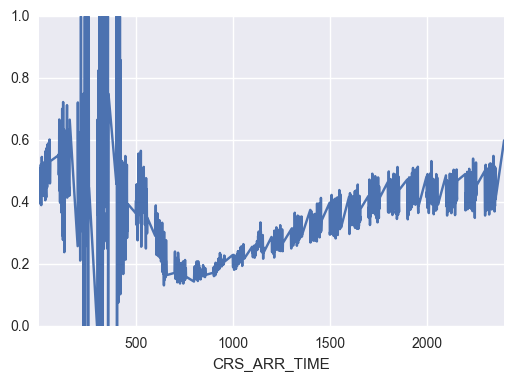

In [36]:
# CRS_ARR_TIME
flights_all.groupby('CRS_ARR_TIME').cat_response.mean().plot()

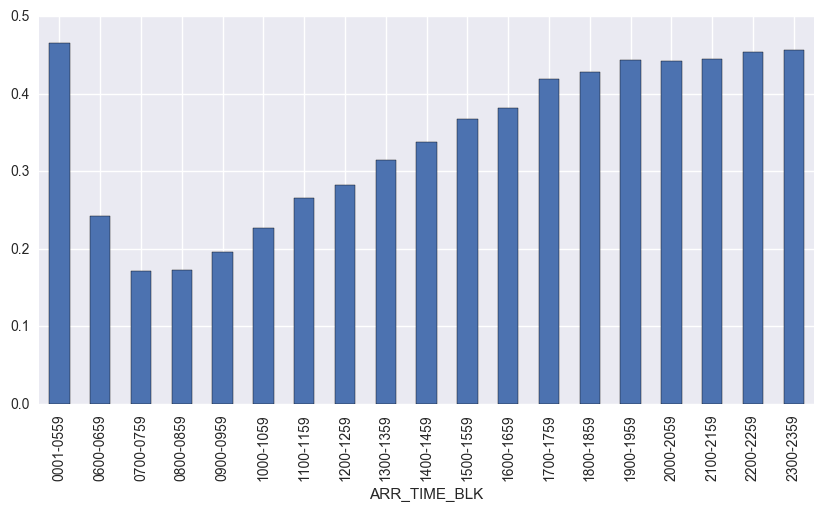

In [37]:
# ARR_TIME_BLK
flights_all.groupby('ARR_TIME_BLK').cat_response.mean().plot(kind='bar',figsize=(10,5))

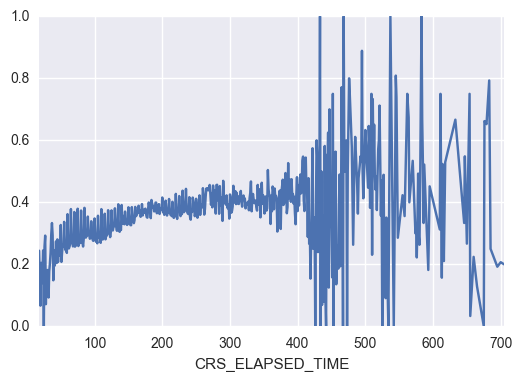

In [38]:
# CRS_ELAPSED_TIME
flights_all.groupby('CRS_ELAPSED_TIME').cat_response.mean().plot()

In [39]:
# FLIGHTS
flights_all.groupby('FLIGHTS').cat_response.mean()

FLIGHTS
1.0    0.346794
Name: cat_response, dtype: float64

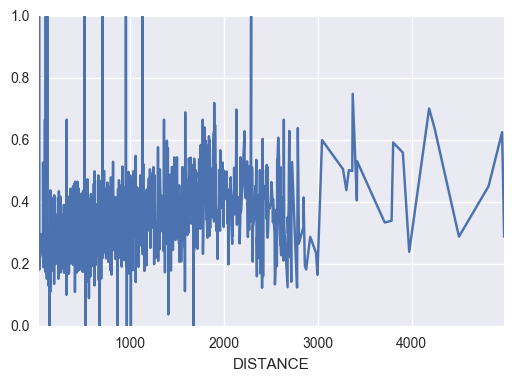

In [40]:
# DISTANCE good
flights_all.groupby('DISTANCE').cat_response.mean().plot()

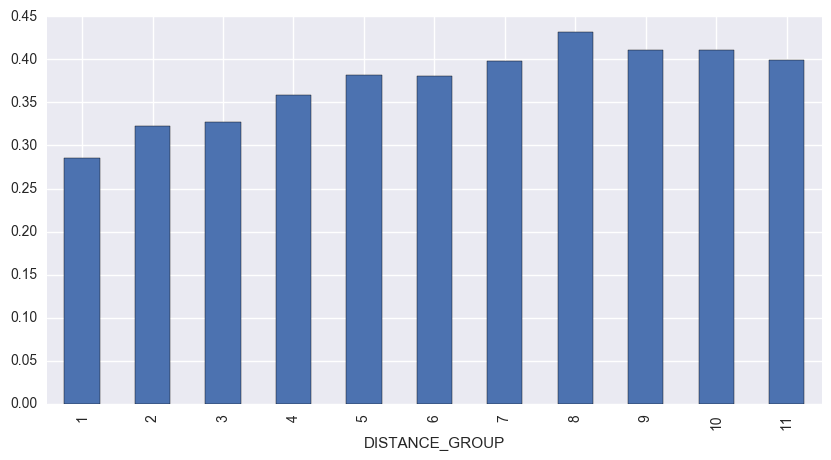

In [41]:
# DISTANCE_GROUP
flights_all.groupby('DISTANCE_GROUP').cat_response.mean().plot(kind='bar',figsize=(10,5))

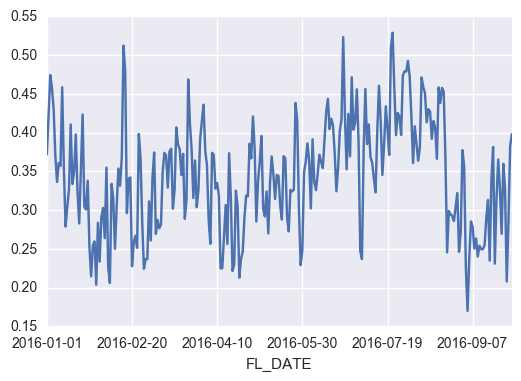

In [42]:
# FL_DATE
flights_all.groupby('FL_DATE').cat_response.mean().plot()

In [43]:
# create dummies for good categorical features

# UNIQUE_CARRIER
carrier_all = pd.get_dummies(flights_all['UNIQUE_CARRIER'], prefix='C', prefix_sep='_')

In [44]:
carrier_all.drop(['C_F9'], axis=1, inplace=True)

In [45]:
carrier_all=carrier_all.to_sparse(fill_value=0);

In [46]:
carrier_all.info()

<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 4169519 entries, 0 to 4233144
Data columns (total 11 columns):
C_AA    float64
C_AS    float64
C_B6    float64
C_DL    float64
C_EV    float64
C_HA    float64
C_NK    float64
C_OO    float64
C_UA    float64
C_VX    float64
C_WN    float64
dtypes: float64(11)
memory usage: 63.1 MB


In [47]:
# ORIGIN
org_all = pd.get_dummies(flights_all['ORIGIN'], prefix='ORG', prefix_sep='_')

In [48]:
org_all.drop(['ORG_ABE'], axis=1, inplace=True)

In [49]:
org_all=org_all.to_sparse(fill_value=0);

In [50]:
org_all.info()

<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 4169519 entries, 0 to 4233144
Columns: 308 entries, ORG_ABI to ORG_YUM
dtypes: float64(308)
memory usage: 63.6 MB


In [51]:
# ORIGIN_STATE_ABR
org_st_all = pd.get_dummies(flights_all['ORIGIN_STATE_ABR'], prefix='ORG_ST', prefix_sep='_')

In [52]:
org_st_all.drop(['ORG_ST_AK'], axis=1, inplace=True)
org_st_all=org_st_all.to_sparse(fill_value=0)

In [53]:
# DEST
dest_all = pd.get_dummies(flights_all['DEST'], prefix='DEST', prefix_sep='_')

In [54]:
dest_all.drop(['DEST_ABE'], axis=1, inplace=True)
dest_all=dest_all.to_sparse(fill_value=0)

In [55]:
# DEST_STATE_ABR
dest_st_all = pd.get_dummies(flights_all['DEST_STATE_ABR'], prefix='DEST_ST', prefix_sep='_')

In [56]:
dest_st_all.drop(['DEST_ST_AK'], axis=1, inplace=True)
dest_st_all=dest_st_all.to_sparse(fill_value=0)

In [57]:
# DEP_TIME_BLK
dep_blk_all = pd.get_dummies(flights_all['DEP_TIME_BLK'], prefix='DEP_BLK', prefix_sep='_')

In [58]:
dep_blk_all.drop(['DEP_BLK_0600-0659'], axis=1, inplace=True)
dep_blk_all=dep_blk_all.to_sparse(fill_value=0)

In [59]:
# ARR_TIME_BLK
arr_blk_all = pd.get_dummies(flights_all['ARR_TIME_BLK'], prefix='ARR_BLK', prefix_sep='_')

In [60]:
arr_blk_all.drop(['ARR_BLK_0600-0659'], axis=1, inplace=True)
arr_blk_all=arr_blk_all.to_sparse(fill_value=0)

In [61]:
# DAY_OF_WEEK
week_day_all = pd.get_dummies(flights_all['DAY_OF_WEEK'], prefix='WEEK_DAY', prefix_sep='_')

In [62]:
week_day_all.drop(['WEEK_DAY_1'], axis=1, inplace=True)
week_day_all=week_day_all.to_sparse(fill_value=0)

In [63]:
# concat numerical features and dummies
flt_X = pd.concat([flights_all.QUARTER,flights_all.MONTH,flights_all.DAY_OF_WEEK,flights_all.DISTANCE_GROUP, carrier_all, org_all, dest_all, org_st_all, dest_st_all, dep_blk_all, arr_blk_all], axis=1)

In [64]:
flt_y = flights_all.cat_response

In [65]:
flt_y.mean()

0.3467944383992494

In [66]:
flt_X.info()

<class 'pandas.sparse.frame.SparseDataFrame'>
Int64Index: 4169519 entries, 0 to 4233144
Columns: 768 entries, QUARTER to ARR_BLK_2300-2359
dtypes: float64(768)
memory usage: 378.0 MB


In [67]:
flt_X.head()

,QUARTER,MONTH,DAY_OF_WEEK,DISTANCE_GROUP,C_AA,C_AS,C_B6,C_DL,C_EV,C_HA,...,ARR_BLK_1400-1459,ARR_BLK_1500-1559,ARR_BLK_1600-1659,ARR_BLK_1700-1759,ARR_BLK_1800-1859,ARR_BLK_1900-1959,ARR_BLK_2000-2059,ARR_BLK_2100-2159,ARR_BLK_2200-2259,ARR_BLK_2300-2359
0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,2.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,2.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,2.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Part 3: Modeling

In [68]:
# split into training and test data sets
from sklearn.cross_validation import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(flt_X, flt_y)

In [69]:
# fit a classification tree with max_depth=30 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=30, random_state=1)
treeclf.fit(X_train_all, y_train_all)
y_pred = treeclf.predict(X_test_all)

from sklearn import metrics
metrics.accuracy_score(y_test_all, y_pred)

0.67996795794240106

In [70]:
# fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=30)

In [71]:
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
rfcl.fit(X_train_all, y_train_all)
y_pred = rfcl.predict(X_test_all)

In [73]:
metrics.accuracy_score(y_test_all, y_pred)

0.68332278055987261

In [78]:
# calculate AUC
y_pred_prob = rfcl.predict_proba(X_test_all)[:, 1]
print metrics.roc_auc_score(y_test_all, y_pred_prob)

0.685686170492


In [74]:
# confusion matrix
pd.crosstab(y_test_all, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,631180,49576,680756
1,280522,81102,361624
All,911702,130678,1042380


In [75]:
rf_feats = pd.DataFrame({'feature':flt_X.columns, 'importance':rfcl.feature_importances_}).sort_values(by='importance', ascending=False)

In [76]:
rf_feats.sort_values(by='importance', ascending=False)

,feature,importance
2,DAY_OF_WEEK,2.267842e-01
1,MONTH,1.440567e-01
14,C_WN,4.143234e-02
0,QUARTER,3.268736e-02
752,ARR_BLK_0800-0859,2.644246e-02
3,DISTANCE_GROUP,2.593511e-02
751,ARR_BLK_0700-0759,2.242183e-02
733,DEP_BLK_0700-0759,1.998169e-02
753,ARR_BLK_0900-0959,1.991825e-02
11,C_OO,1.776410e-02


In [271]:
# fit a logistic model
from sklearn.linear_model import LogisticRegression
log_reg_all = LogisticRegression(C=1e2)
log_reg_all.fit(X_train_all, y_train_all)
y_pred_all = log_reg_all.predict(X_test_all)
print metrics.accuracy_score(y_test_all, y_pred_all)

0.677620445519


In [272]:
# calculate AUC
y_pred_prob = log_reg_all.predict_proba(X_test_all)[:, 1]
print metrics.roc_auc_score(y_test_all, y_pred_prob)

0.675552627274


In [273]:
# compare to null accuracy
1-y_test_all.mean()

0.6531370517469637

In [238]:
feature_range = range(90,769,10)
log_scores = []
for value in feature_range:
    log_reg_all = LogisticRegression(C=1e2)
    scores = cross_val_score(log_reg_all, flt_X[select_feats[0:value]], flt_y, cv=5, scoring='roc_auc')
    log_scores.append(np.mean(scores))


KeyboardInterrupt: 

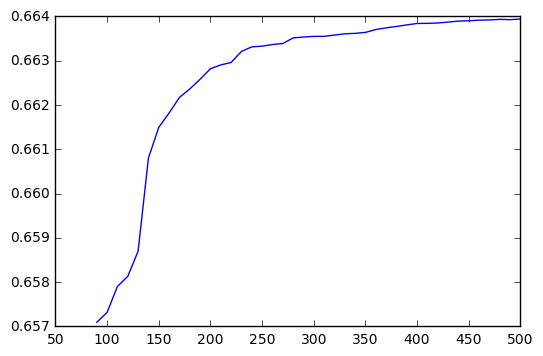

In [242]:
plt.plot(feature_range[0:42],log_scores)

### Part 3.2: Add new features

In [79]:
# create low cost carrier categorical feature
low_cost_carriers = ['G4','F9','B6','WN','NK','SY']
flights_all['LOW_COST']=flights_all['UNIQUE_CARRIER'].isin(low_cost_carriers)

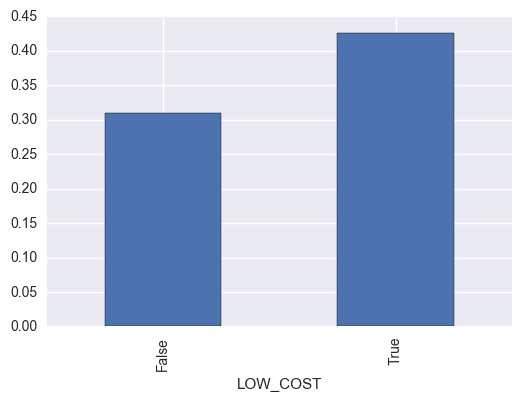

In [80]:
flights_all.groupby('LOW_COST').cat_response.mean().plot(kind='bar')

In [81]:
# create regional carrier categorical feature
regional_carriers = ['ZW','9K','C5','CP','9E','MQ','EV','QX','WP','M5','YV','MW','KS','PT','OH','7H','YX','S5','3M','OO','AX','VC','G7','ZK']
flights_all['REGIONAL']=flights_all['UNIQUE_CARRIER'].isin(regional_carriers)

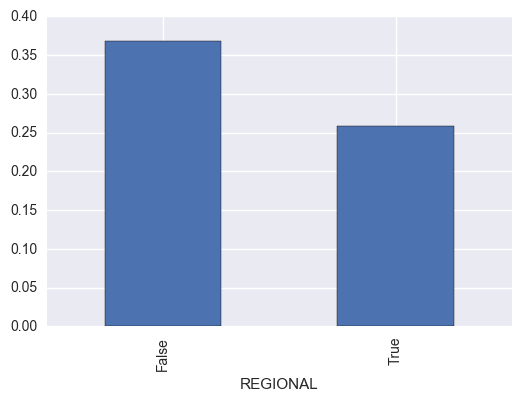

In [82]:
flights_all.groupby('REGIONAL').cat_response.mean().plot(kind='bar')

In [83]:
# create number of airlines serving airport feature
num_carrier = flights_all.groupby('ORIGIN').UNIQUE_CARRIER.value_counts()

In [84]:
num_carrier = num_carrier.groupby(level=0).count().to_dict()

In [85]:
flights_all['NUM_CARRIERS'] = flights_all['ORIGIN'].apply(lambda x: num_carrier[x])

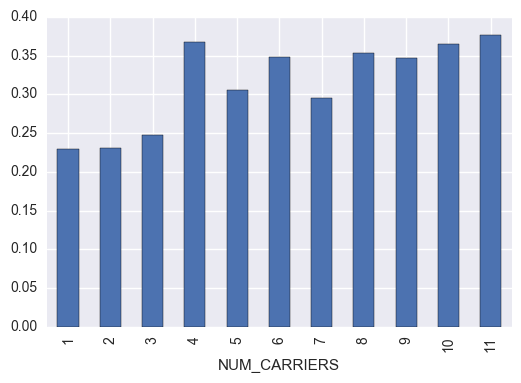

In [86]:
flights_all.groupby('NUM_CARRIERS').cat_response.mean().plot(kind='bar')

In [87]:
# create number of flights serving origin airport feature (traffic)
num_flights = flights_all.groupby('ORIGIN').UNIQUE_CARRIER.count()

In [88]:
num_flights.sort_values()

ORIGIN
EFD         1
MHK         1
AKN        63
ADK        75
MMH        77
ABI        78
DLG        83
GST        83
PPG        93
HYA       115
GRI       158
UST       166
GUC       200
WYS       224
OTH       229
MVY       234
GCK       235
PBG       243
GGG       244
IAG       262
GUM       274
ROW       278
TYR       395
ADQ       409
DVL       422
JLN       423
HOB       448
LAR       450
HYS       450
INL       454
        ...  
STL     40779
PDX     43540
TPA     50741
DAL     50845
MIA     52051
PHL     54119
DCA     57680
SAN     57845
FLL     61702
MDW     64898
BWI     69957
LGA     71360
JFK     73079
SLC     81385
CLT     81897
EWR     83309
BOS     90131
DTW     91964
MCO     93728
MSP     96932
SEA    100312
IAH    101678
LAS    111991
PHX    118744
SFO    127506
DFW    146634
LAX    158150
DEN    168023
ORD    180708
ATL    287450
Name: UNIQUE_CARRIER, dtype: int64

In [89]:
num_flights = num_flights.to_dict()

In [90]:
flights_all['NUM_FLIGHTS_ORG'] = flights_all['ORIGIN'].apply(lambda x: num_flights[x])

In [91]:
# create number of flights serving dest airport feature (traffic)
num_flights_dest = flights_all.groupby('DEST').UNIQUE_CARRIER.count()
num_flights_dest.sort_values()

DEST
MHK         1
AKN        63
ADK        75
ABI        79
MMH        81
GST        82
DLG        84
PPG        93
HYA       116
GRI       159
UST       166
GUC       200
WYS       224
OTH       225
MVY       234
GCK       237
PBG       244
GGG       244
IAG       266
GUM       274
ROW       278
TYR       395
ADQ       409
JLN       425
DVL       427
HOB       446
LAR       448
HYS       449
ESC       458
INL       464
        ...  
STL     40848
PDX     43643
DAL     50649
TPA     50798
MIA     52007
PHL     54107
DCA     57721
SAN     58000
FLL     61650
MDW     64839
BWI     69954
LGA     71228
JFK     72927
SLC     81522
CLT     81717
EWR     83222
BOS     90301
DTW     92103
MCO     93717
MSP     96921
SEA    100371
IAH    101261
LAS    112121
PHX    118460
SFO    127561
DFW    146142
LAX    158299
DEN    167621
ORD    180413
ATL    287287
Name: UNIQUE_CARRIER, dtype: int64

In [92]:
num_flight_dest = num_flights_dest.to_dict()
flights_all['NUM_FLIGHTS_DEST'] = flights_all['DEST'].apply(lambda x: num_flights_dest[x])

In [93]:
# create holiday feature
from pandas.tseries.holiday import get_calendar, USFederalHolidayCalendar, HolidayCalendarFactory, GoodFriday, EasterMonday
cal = get_calendar('USFederalHolidayCalendar')  # Create calendar instance
tradingCal = HolidayCalendarFactory('TradingCalendar', cal, GoodFriday)
tradingCal = HolidayCalendarFactory('TradingCalendar', tradingCal, EasterMonday)
tradingCal.rules

[Holiday: Labor Day (month=9, day=1, offset=<DateOffset: kwds={'weekday': MO(+1)}>),
 Holiday: Presidents Day (month=2, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>),
 Holiday: Columbus Day (month=10, day=1, offset=<DateOffset: kwds={'weekday': MO(+2)}>),
 Holiday: Veterans Day (month=11, day=11, observance=<function nearest_workday at 0x179445668>),
 Holiday: Good Friday (month=1, day=1, offset=[<Easter>, <-2 * Days>]),
 Holiday: Dr. Martin Luther King Jr. (month=1, day=1, offset=<DateOffset: kwds={'weekday': MO(+3)}>),
 Holiday: New Years Day (month=1, day=1, observance=<function nearest_workday at 0x179445668>),
 Holiday: Thanksgiving (month=11, day=1, offset=<DateOffset: kwds={'weekday': TH(+4)}>),
 Holiday: July 4th (month=7, day=4, observance=<function nearest_workday at 0x179445668>),
 Holiday: Easter Monday (month=1, day=1, offset=[<Easter>, <Day>]),
 Holiday: Christmas (month=12, day=25, observance=<function nearest_workday at 0x179445668>),
 Holiday: MemorialDay (mont

In [94]:
from datetime import datetime
cal1 = tradingCal()
holidays = cal1.holidays(start=flights_all.FL_DATE.min(), end=flights_all.FL_DATE.max())
print holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-15', '2016-03-25',
               '2016-03-28', '2016-05-30', '2016-07-04', '2016-09-05'],
              dtype='datetime64[ns]', freq=None)


In [95]:
flights_all['HOLIDAY'] = pd.to_datetime(flights_all.FL_DATE).isin(holidays)

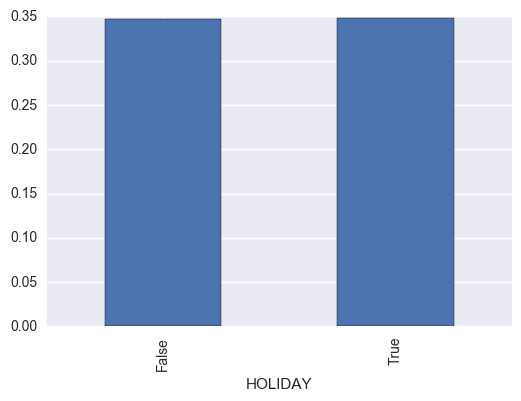

In [96]:
flights_all.groupby('HOLIDAY').cat_response.mean().plot(kind='bar')

### Part 3.3: Rerun Model

In [97]:
flt_X = pd.concat([flights_all.QUARTER,flights_all.MONTH,flights_all.DAY_OF_WEEK,flights_all.DISTANCE_GROUP,flights_all.LOW_COST,flights_all.REGIONAL,flights_all.NUM_CARRIERS,flights_all.NUM_FLIGHTS_ORG,flights_all.NUM_FLIGHTS_DEST, carrier_all, org_all, dest_all, org_st_all, dest_st_all, dep_blk_all, arr_blk_all], axis=1)

In [98]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(flt_X, flt_y)

In [284]:
log_reg_all = LogisticRegression(C=1e2)
log_reg_all.fit(X_train_all, y_train_all)
y_pred_all = log_reg_all.predict(X_test_all)
print metrics.accuracy_score(y_test_all, y_pred_all)

0.653244498168


In [99]:
rfcl = RandomForestClassifier(max_depth=30)
rfcl.fit(X_train_all, y_train_all)
y_pred = rfcl.predict(X_test_all)
metrics.accuracy_score(y_test_all, y_pred)

0.68667664383430227

In [100]:
# calculate AUC
y_pred_prob = rfcl.predict_proba(X_test_all)[:, 1]
print metrics.roc_auc_score(y_test_all, y_pred_prob)

0.687803846426


In [101]:
pd.DataFrame({'feature':flt_X.columns, 'importance':rfcl.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
2,DAY_OF_WEEK,2.571072e-01
1,MONTH,1.451776e-01
0,QUARTER,3.008162e-02
19,C_WN,2.597116e-02
7,NUM_FLIGHTS_ORG,2.592528e-02
4,LOW_COST,2.462230e-02
3,DISTANCE_GROUP,2.284735e-02
757,ARR_BLK_0800-0859,2.134519e-02
738,DEP_BLK_0700-0759,1.873282e-02
758,ARR_BLK_0900-0959,1.838834e-02


In [102]:
# confusion matrix
pd.crosstab(y_test_all, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,614761,66385,681146
1,260217,101017,361234
All,874978,167402,1042380
